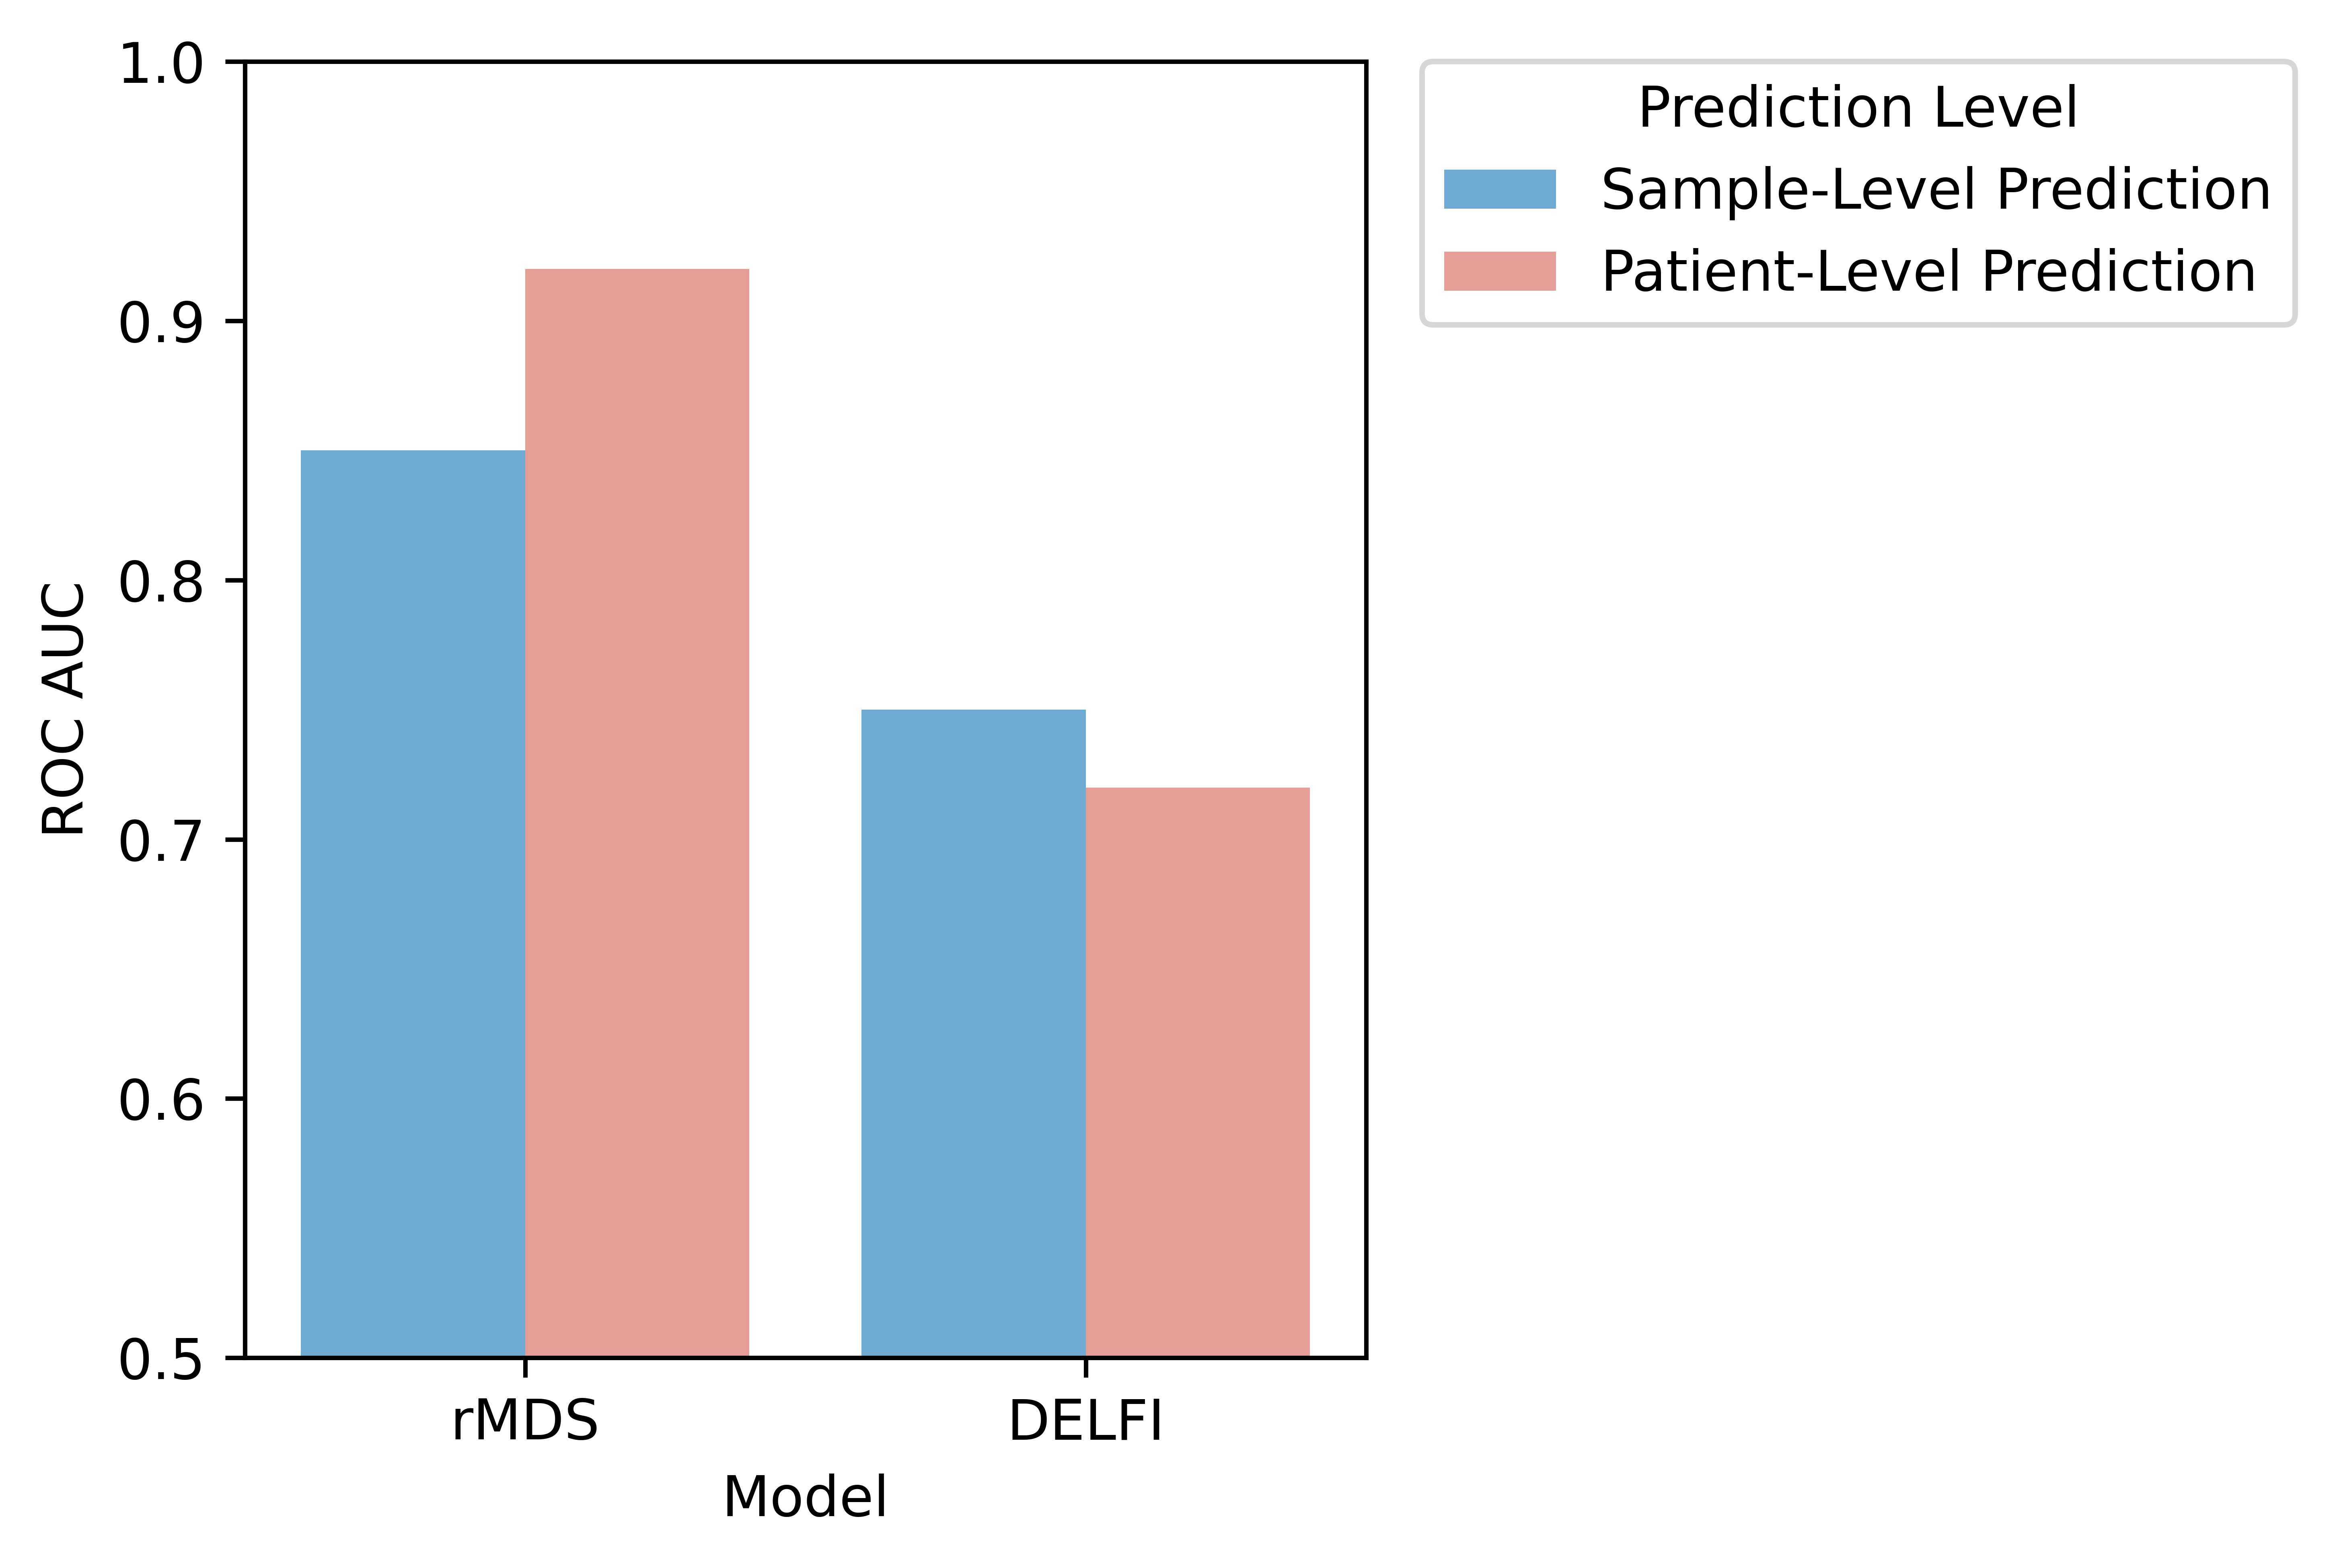

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "rMDS": [0.85, 0.92],
    "DELFI": [0.75, 0.72],
}
index = ["Sample-Level Prediction", "Patient-Level Prediction"]
df = pd.DataFrame(data, index=index)

df_plot = df.T.reset_index().melt(id_vars="index", var_name="Level", value_name="ROC AUC")
df_plot.rename(columns={"index": "Model"}, inplace=True)

model_order = ["rMDS", "DELFI"]
level_order = ["Sample-Level Prediction", "Patient-Level Prediction"]

plt.figure(figsize=(6, 4), dpi=1000)
ax = sns.barplot(
    data=df_plot,
    x="Model",
    y="ROC AUC",
    hue="Level",
    palette=["#5DADE2", "#F1948A"],
    order=model_order,
    hue_order=level_order
)

bar_centers = {}
for bar, (model, level) in zip(ax.patches, [(m, l) for m in model_order for l in level_order]):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if level not in bar_centers:
        bar_centers[level] = []
    bar_centers[level].append((x, y))


plt.ylim(0.5, 1)
plt.ylabel("ROC AUC")
plt.xlabel("Model")
plt.xticks(rotation=0)
ax.legend(
    title="Prediction Level",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0
)
plt.tight_layout()
plt.savefig('SF9.pdf')
plt.show()

